## Introduction to `Geoplanar`

### Data Processing For US and Canada

In order to reproduce the notebook you will need to download the US counties/states dataset from [GADM Database](https://gadm.org/data.html) and place it in the notebooks folder ../geoplanar/datasets/canada". 
The coordinate reference system is for GADM data is given as longitude/latitude and the WGS84 datum.

Steps Guide
1. Country Data Retrieval and Cleaning for Gaps
2. Data Merging
3. Saving Data


In [1]:
import geoplanar
import geopandas as gpd

## 1. Data Retrieval and Cleaning for Gaps

#### Canada Level 1 Data

<AxesSubplot:>

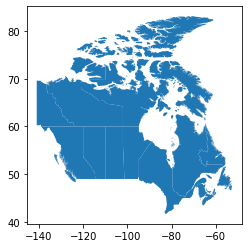

In [2]:
can_1 = gpd.read_file("zip://../../geoplanar/datasets/canada/gadm36_CAN_shp.zip/gadm36_CAN_1.shp")
can_1.plot()

In [3]:

can_1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
can_1.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,CAN,Canada,CAN.1_1,Alberta,None,None,Province,Province,48,CA.AB,"POLYGON ((-111.95341 49.00005, -111.96084 49.0..."
1,CAN,Canada,CAN.2_1,British Columbia,Colombie britannique|New Caledonia,None,Province,Province,59,CA.BC,"MULTIPOLYGON (((-123.54056 48.31833, -123.5402..."
2,CAN,Canada,CAN.3_1,Manitoba,None,None,Province,Province,46,CA.MB,"MULTIPOLYGON (((-90.38500 57.18528, -90.38500 ..."
3,CAN,Canada,CAN.4_1,New Brunswick,Nouveau-Brunswick|Acadia,None,Province,Province,13,CA.NB,"MULTIPOLYGON (((-66.84995 44.48388, -66.85000 ..."
4,CAN,Canada,CAN.5_1,Newfoundland and Labrador,Newfoundland|Terre-Neuve|Terre-Neuve-et-Labrador,None,Province,Province,10,CA.NF,"MULTIPOLYGON (((-53.37361 46.72556, -53.37375 ..."


#### Detecting and Cleaning Gaps

In [5]:
gaps=geoplanar.gaps(can_1)
gaps.shape

(40, 1)

In [6]:
can_new= geoplanar.fill_gaps(can_1)

/Users/wajiha/Documents/projects/geoplanar/geoplanar/gap.py:114: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  predicate='intersects')
/Users/wajiha/Documents/projects/geoplanar/geoplanar/gap.py:116: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  left = neighbors[neighbors.area==neighbors.area.max()]
/Users/wajiha/Documents/projects/geoplanar/geoplanar/gap.py:114: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  predicate='intersects')
/Users/wajiha/Documents/projects/geoplanar/geoplanar/gap.py:116: UserWarning:

In [7]:
gaps_can_new=geoplanar.gaps(can_new)
gaps_can_new.shape

(0, 1)

### US Level 1 Data

In [8]:
import libpysal
us = libpysal.examples.load_example('us_income')

In [9]:
us.get_file_list()

['/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/spi_download.csv',
 '/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/usjoin.csv',
 '/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/states48.gal',
 '/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/README.md',
 '/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/us48.shx',
 '/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/us48.shp',
 '/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/us48.dbf']

In [10]:
us_1 = gpd.read_file(us.get_path("us48.shp"))

In [11]:
us_1.crs = can_1.crs
us_1 = us_1.to_crs(can_1.crs)

In [12]:
#us_1.crs

<AxesSubplot:>

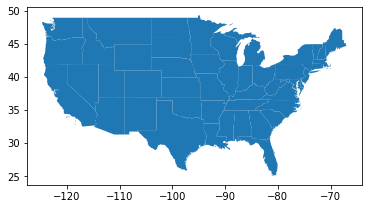

In [13]:
us_1.plot()

In [14]:
us_1.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,20.750,34.956,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
1,45.132,34.527,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6..."
2,9.571,18.899,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ..."
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939..."
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9..."


#### Detecting and Cleaning Gaps

In [15]:
gaps=geoplanar.gaps(us_1)
gaps.shape

(1, 1)

In [16]:
us_new= geoplanar.fill_gaps(us_1)

/Users/wajiha/Documents/projects/geoplanar/geoplanar/gap.py:114: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  predicate='intersects')
/Users/wajiha/Documents/projects/geoplanar/geoplanar/gap.py:116: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  left = neighbors[neighbors.area==neighbors.area.max()]


In [21]:
gaps_us_new=geoplanar.gaps(us_new)
gaps_us_new.shape

(0, 1)

## 2. Merging Data

Now we have the data for US and Canada (witout gaps). We can combine the admininstrative data for US and Canada level 1 subdivision and plot it. But first we assign a country label to each country.

In [17]:
#assigning a country label to each df
can_new ['COUNTRY'] = 'CANADA'
us_new ['COUNTRY'] = 'US'

<AxesSubplot:>

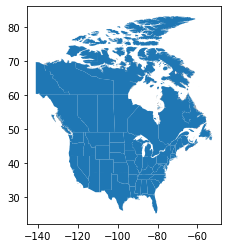

In [18]:
uscan_1 = us_new.append(can_new)
uscan_1.reset_index(inplace=True )
uscan_1.plot()

In [19]:
uscan_1.shape

(61, 21)

### Saving Data 

In [22]:
uscan_1.to_parquet("../../geoplanar/datasets/uscan/uscan_1.parquet")   

/Users/wajiha/opt/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.
